<img src=https://upload.wikimedia.org/wikipedia/commons/c/c3/Logo_UFMG.png  alt="drawing" width="200"/></img>

> <center><h1>Trabalho 1</h1></center>
> <center><h2>Aluna: Klara Narumi de Hamada Maia</h2></center>

# ***Preparação dos Dados***

<h2 style= "color: #000080"> Banco de Dados </h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
# leitura do banco de dados
df = pd.read_csv('koi_data.csv')

In [ ]:
df.info()

In [ ]:
df.describe()

In [3]:
# transforma a variável resposta em numerico
le = preprocessing.LabelEncoder()
df['koi_disposition_f']=le.fit_transform(df['koi_disposition'])

<h2 style= "color: #000080">  Variável Resposta e Features - Treino e Teste </h2>

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = df['koi_disposition_f']

In [6]:
X = df.iloc[:,2:43]

In [7]:
# 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

***

# ***Experimentos***

<h2 style= "color: #8B4513 "> Naive Bayes </h2>
O objetivo do experimento é entender como funciona o Naive Bayes e os resultados foram uma acurácia menor que 0.8 e um desempenho aceitável.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [9]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(gnb, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

Acurácia: 0.7969250480461243
Cross-Validation K-Fold(5): 0.7996902017291067


<h2 style= "color: #8B4513 "> Decision Tree </h2>
O objetivo do experimento é entender como o modelo se comporta com a variação da altura de árvores(features). Com isso, neste experimento conclui-se que quanto mais features maior a sua acurácia entretanto o seu desempenho não cresce proporcionalmente. Dessa forma, é importante avaliar se a variação da acurácia e desemepnho são significantes para aumentar o número de árvores.

In [10]:
from sklearn import tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#pip install pydotplus
import pydotplus

/Users/klaranarumi/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [11]:
# lista com os nomes das colunas do data frame
names_df = []
for i in X.columns:
    names_df.append(i)

<h3 style= "color: #D2691E "> Altura Máxima de 3 </h3>

In [13]:
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
y_pred = clf_tree.fit(X, y).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(clf_tree, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

Acurácia: 0.9154388212684177
Cross-Validation K-Fold(5): 0.9259899874381142


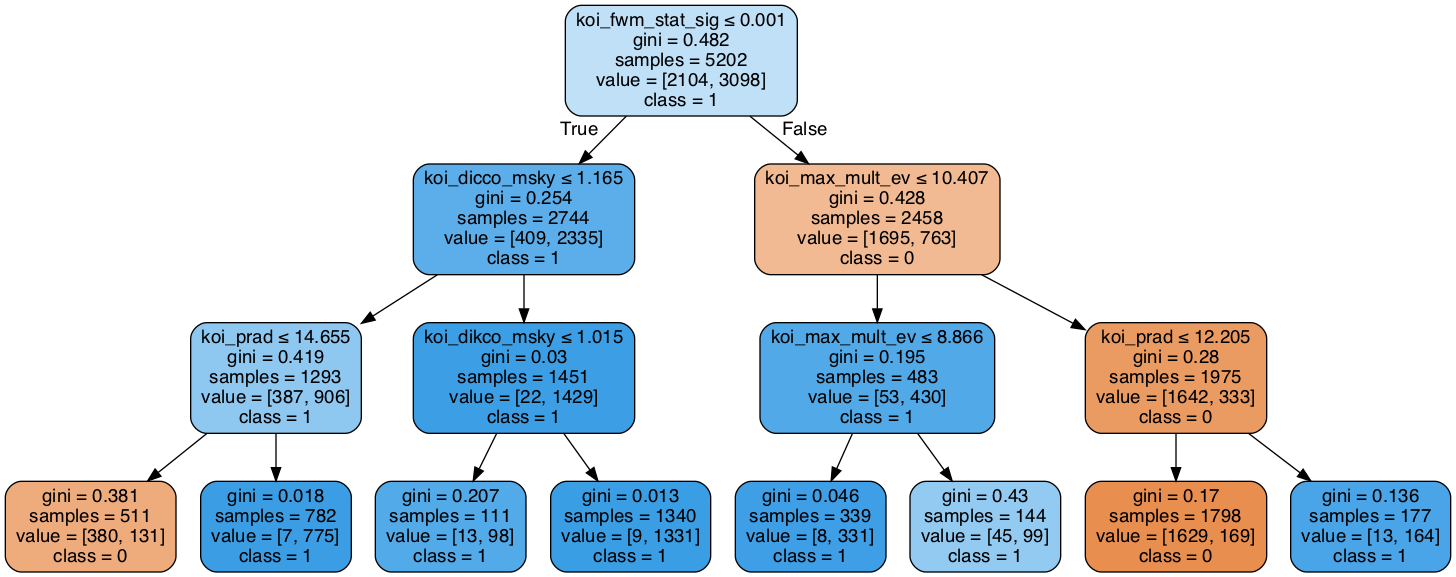

In [15]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = names_df,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#salva a imagem no pc
graph.write_png('altura_3.png')
Image(graph.create_png())

<h3 style= "color: #D2691E "> Altura Máxima de 14 </h3>

In [16]:
clf_tree = tree.DecisionTreeClassifier(max_depth=14)
y_pred = clf_tree.fit(X, y).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(clf_tree, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

Acurácia: 0.9967969250480462
Cross-Validation K-Fold(5): 0.9494441365550876


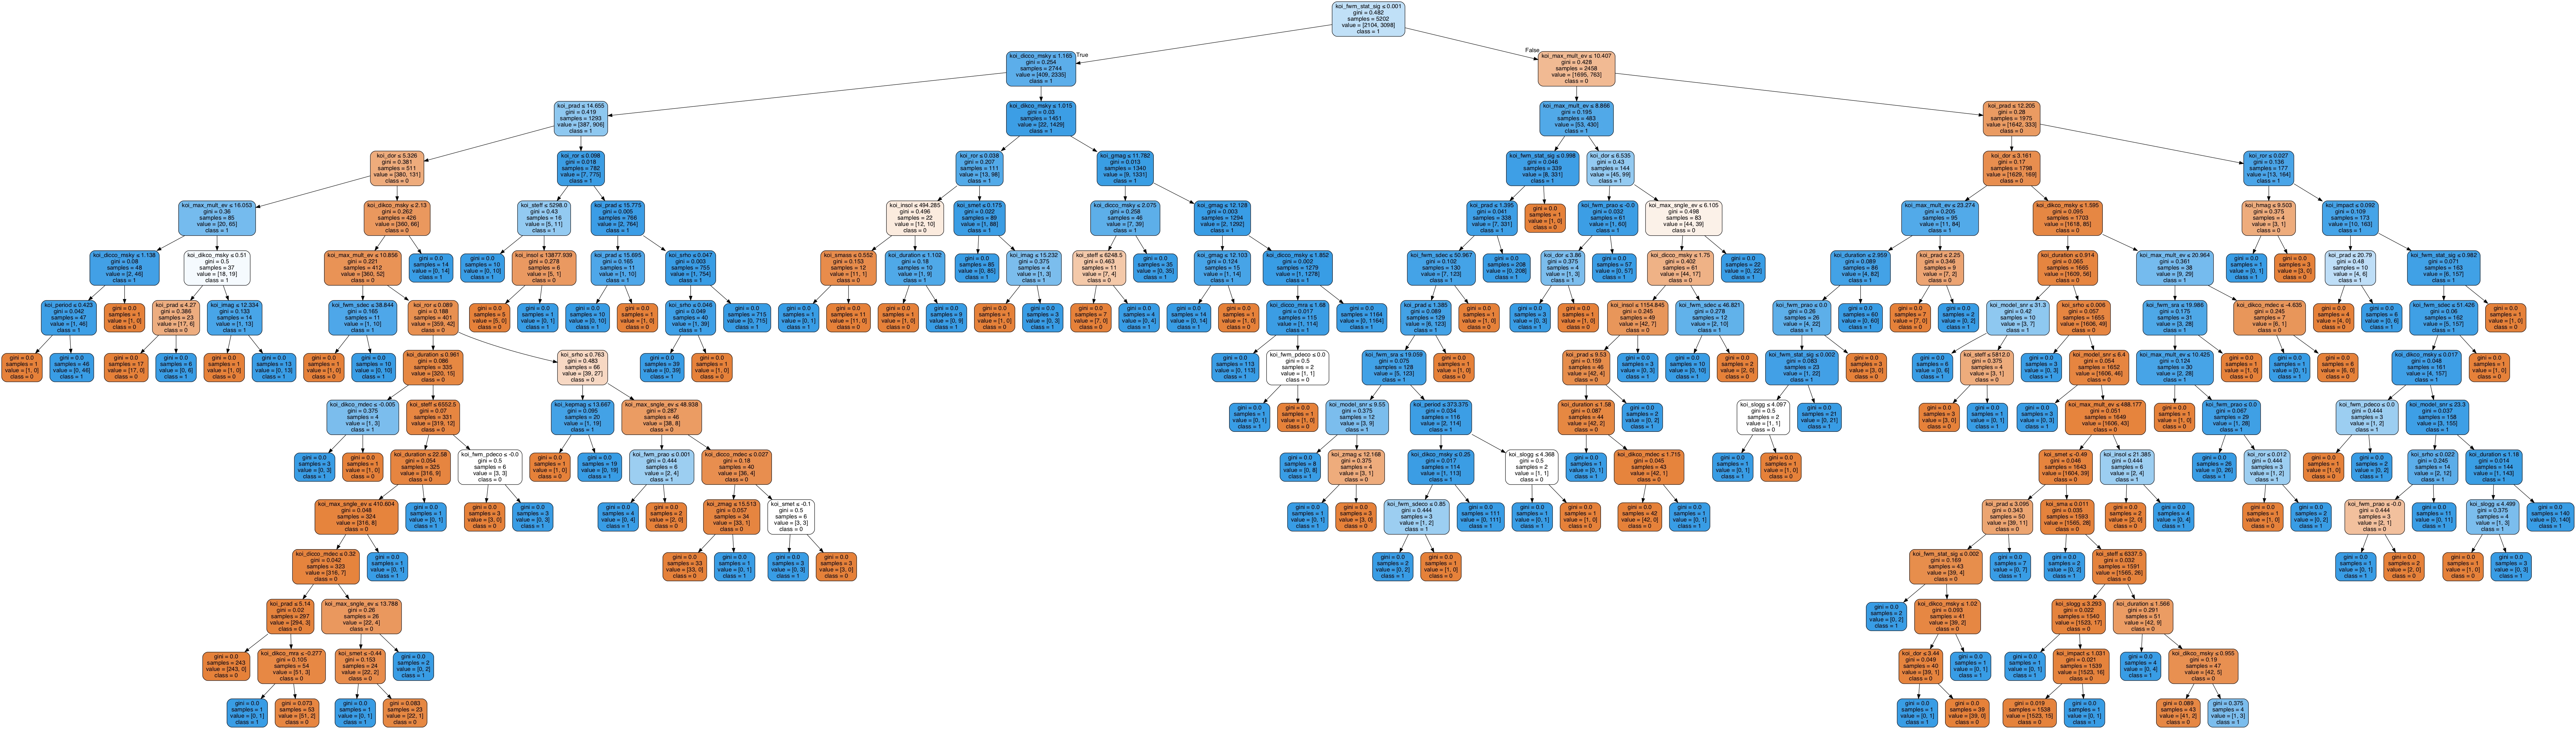

In [17]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = names_df,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#salva a imagem no pc
graph.write_png('altura_14.png')
Image(graph.create_png())

<h3 style= "color: #D2691E "> Altura Ilimitada </h3>

In [18]:
clf_tree = tree.DecisionTreeClassifier()
y_pred = clf_tree.fit(X, y).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(clf_tree, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

Acurácia: 1.0
Cross-Validation K-Fold(5): 0.9490571196334884


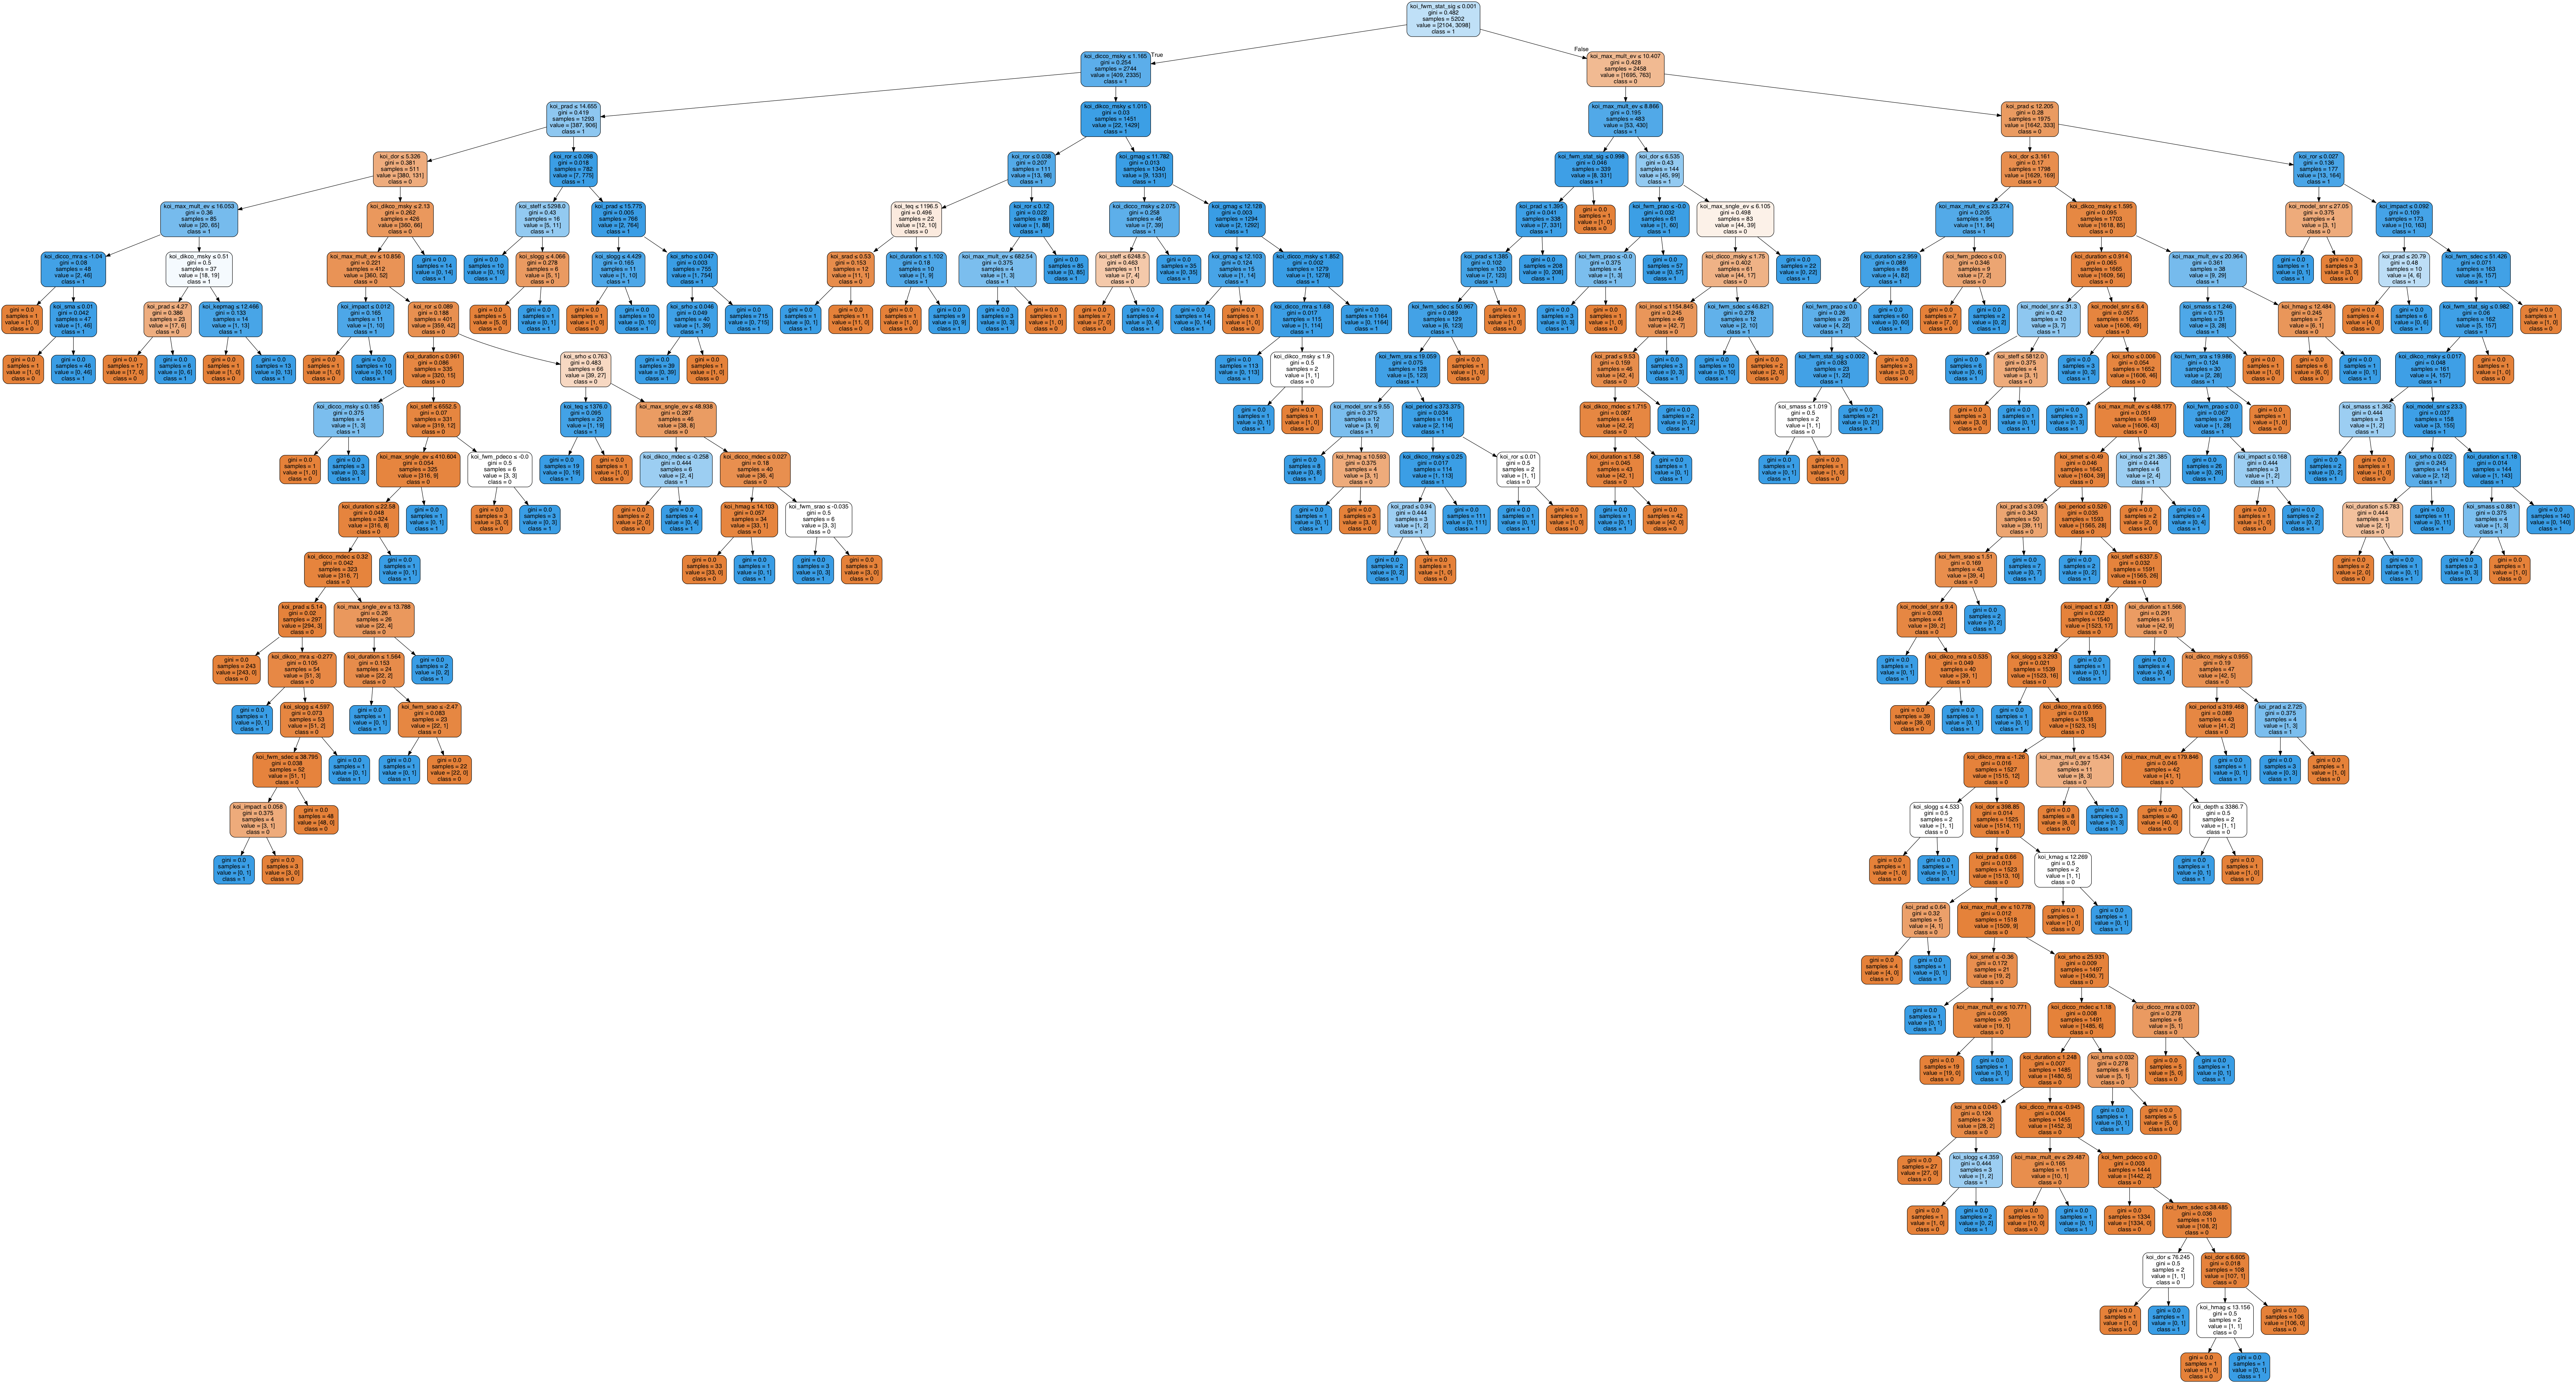

In [19]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = names_df,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#salva a imagem no pc
graph.write_png('altura_ilimitada.png')
Image(graph.create_png())

<h2 style= "color: #8B4513 "> SVM </h2>
O objetivo do experimento é entender na prática como se comporta os tipos da técnica kernel(reorganizam os dados) e qual melhor se adequa para o problema especifico. Nesta situação o Kernel Linear apresentou melhores resultados

In [23]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

<h3 style= "color: #D2691E "> Kernel Linear </h3>

In [ ]:
svclassifier = SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.fit(X_train, y_train).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(svclassifier, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

 <h3 style= "color: #D2691E "> Kernel Sigmoid </h3>

In [ ]:
svclassifier = SVC(kernel='sigmoid')

In [ ]:
y_pred = svclassifier.fit(X_train, y_train).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(svclassifier, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

<h3 style= "color: #D2691E "> Kernel Polinomial</h3>

In [ ]:
svclassifier = SVC(kernel='poly')

In [ ]:
y_pred = svclassifier.fit(X_train, y_train).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(svclassifier, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

<h3 style= "color: #D2691E "> Kernel RBF</h3>

In [ ]:
svclassifier = SVC(kernel = 'rbf')

In [ ]:
y_pred = svclassifier.fit(X_train, y_train).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(svclassifier, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

<h2 style= "color: #8B4513 "> k-NN </h2>
O objetivo do experimento é entender como a variação dos vizinhos(os valores mais próximos) interefe na qualidade do modelo. Assim, observa-se que os valores de acurácia e desempenho não tem uma relação linear com o número de vizinhos, mas uma quantidade de vizinhos muito baixa tem um modelo ruim.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

<h3 style= "color: #D2691E "> k-NN - 2</h3>

In [22]:
knn = KNeighborsClassifier(n_neighbors=2)

In [24]:
y_pred = knn.fit(X_train, y_train).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(knn, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

Acurácia: 0.7604099935938501
Cross-Validation K-Fold(5): 0.7451038202911402


<h3 style= "color: #D2691E "> k-NN - 5</h3>

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
y_pred = knn.fit(X_train, y_train).predict(X_test)

print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(knn, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

Acurácia: 0.8001281229980781
Cross-Validation K-Fold(5): 0.7927713736791546


<h3 style= "color: #D2691E "> k-NN - 8</h3>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = knn.fit(X_train, y_train).predict(X_test)


print("Acurácia:",accuracy_score(y_test, y_pred))

kfold  = KFold(n_splits=5, shuffle=True) 
result = cross_val_score(knn, X, y, cv = kfold)
print("Cross-Validation K-Fold(5): {0}".format(result.mean()))

<h3 style= "color: #D2691E ">  K values de 1 a 30</h3>

In [52]:
acuaracia = []
 
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    pred_i = knn.fit(X_train, y_train).predict(X_test)
    acuaracia.append(accuracy_score(y_test, pred_i))

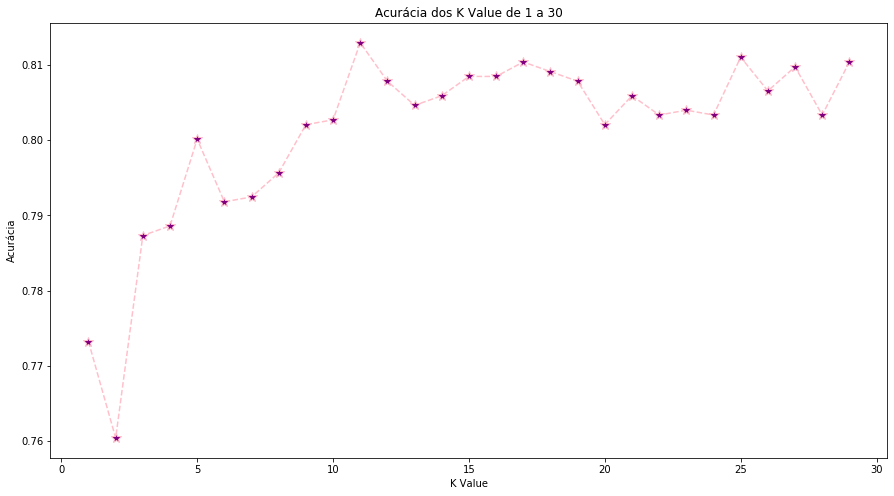

In [53]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), acuaracia, color='pink', linestyle='dashed', marker='*',
         markerfacecolor='purple', markersize=10)
plt.title('Acurácia dos K Value de 1 a 30')
plt.xlabel('K Value')
plt.ylabel('Acurácia')
plt.show()

In [46]:
cross_val_5 = []
kfold  = KFold(n_splits=5, shuffle=True) 

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    result = cross_val_score(knn, X, y, cv = kfold)
    cross_val_5.append(result.mean())

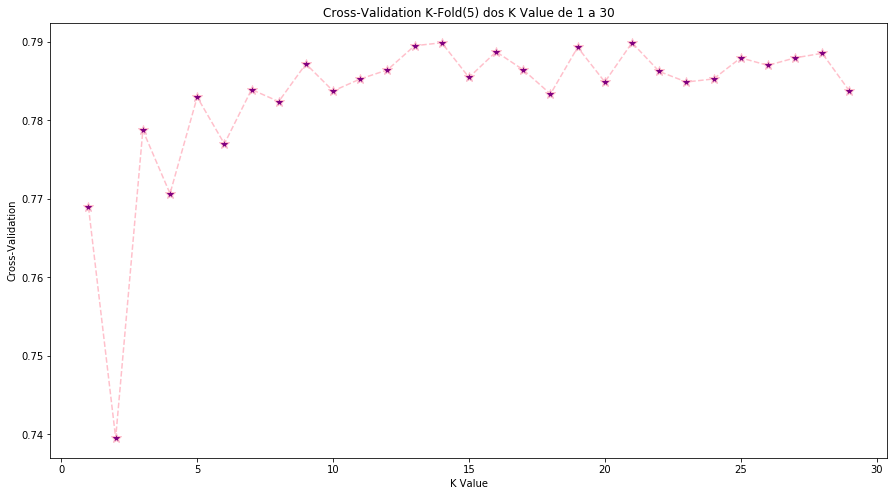

In [47]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), cross_val_5, color='pink', linestyle='dashed', marker='*',
         markerfacecolor='purple', markersize=10)
plt.title('Cross-Validation K-Fold(5) dos K Value de 1 a 30')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation')
plt.show()

<h2 style= "color: #8B4513 "> Random Forest </h2>
O objetivo do experimento é similar ao Decision Tree. Os resultados da acurácia e do desempenho tem um comprotamento parecido mas a relação com o número de árvores varia muito, analisando 11 árvores apresenta o melhor resultado de acurácia e 14 árvores o melhor desempenho.

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
acuracia = []

for i in range(1, 15):
    rfc = RandomForestClassifier(n_estimators=i)
    pred_i = rfc.fit(X_train, y_train).predict(X_test)
    acuracia.append(accuracy_score(y_test, pred_i))

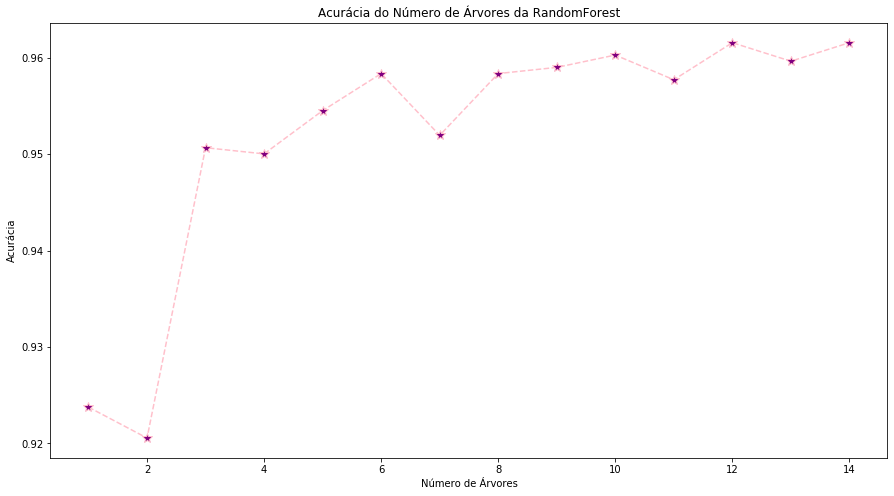

In [55]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 15), acuracia, color='pink', linestyle='dashed', marker='*',
         markerfacecolor='purple', markersize=10)
plt.title('Acurácia do Número de Árvores da RandomForest')
plt.xlabel('Número de Árvores')
plt.ylabel('Acurácia')
plt.show()

In [48]:
cross_val_5 = []
kfold  = KFold(n_splits=5, shuffle=True) 

for i in range(1, 15):
    rfc = RandomForestClassifier(n_estimators=i)
    result = cross_val_score(rfc, X, y, cv = kfold)
    cross_val_5.append(result.mean())

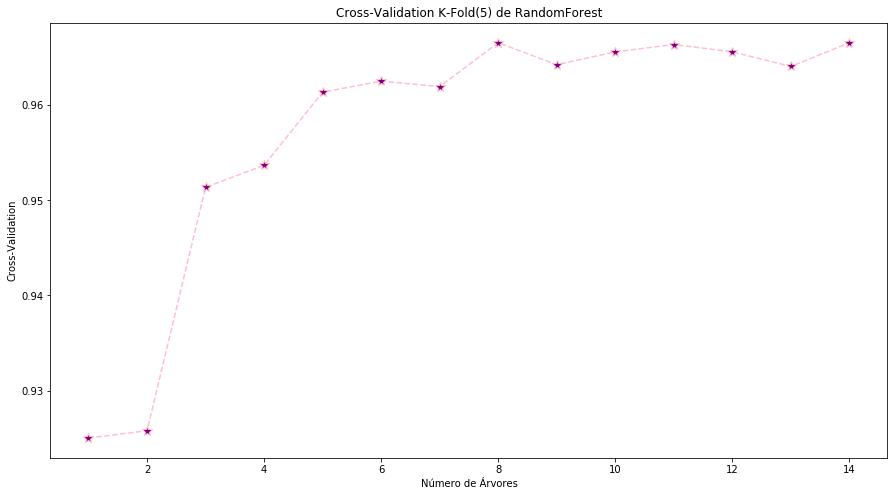

In [49]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 15), cross_val_5, color='pink', linestyle='dashed', marker='*',
         markerfacecolor='purple', markersize=10)
plt.title('Cross-Validation K-Fold(5) de RandomForest')
plt.xlabel('Número de Árvores')
plt.ylabel('Cross-Validation')
plt.show()

<h2 style= "color: #8B4513 "> Gradient Tree Boosting </h2>
    O objetivo do experimento é similar ao Decision Tree e Random Forest, comparar a quantidade de árvores. Os resultados da acurácia comparado ao número de iterações msotrou uma diferença muito baixa, diferente da validação cruzada k-fold que mostra quanto maior núemro de iterações provavelmene maior o seu valor. Dessa forma, como quanto maior a variação do cross melhor é o modelo, teve destaque no com 6 iterações.

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
acuracia = []

for i in range(1, 15):
    clf_gradient = GradientBoostingClassifier(n_iter_no_change=i)
    pred_i = clf_gradient.fit(X_train, y_train).predict(X_test)
    acuracia.append(accuracy_score(y_test, pred_i)) 

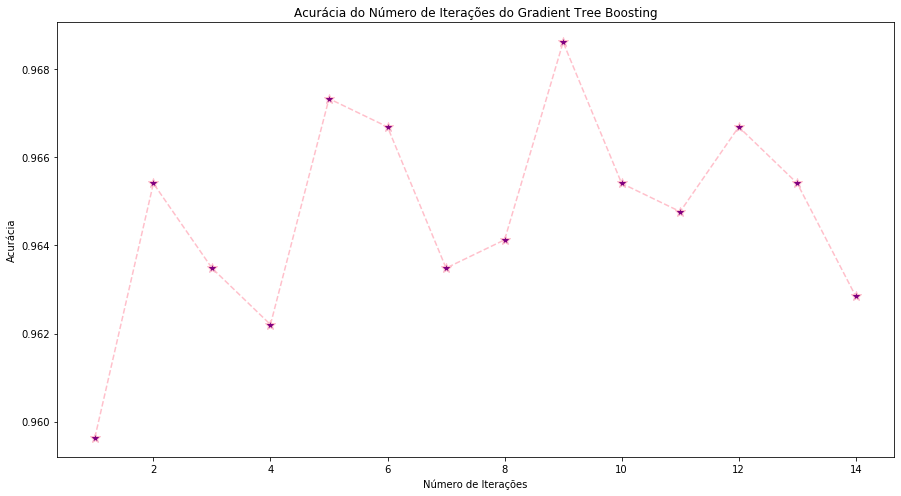

In [61]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 15), acuracia, color='pink', linestyle='dashed', marker='*',
         markerfacecolor='purple', markersize=10)
plt.title('Acurácia do Número de Iterações do Gradient Tree Boosting')
plt.xlabel('Número de Iterações')
plt.ylabel('Acurácia')
plt.show()

In [62]:
cross_val_5 = []
kfold  = KFold(n_splits=5, shuffle=True) 

for i in range(1, 15):
    clf_gradient = GradientBoostingClassifier(n_iter_no_change=i)
    result = cross_val_score(clf_gradient, X, y, cv = kfold)
    cross_val_5.append(result.mean())

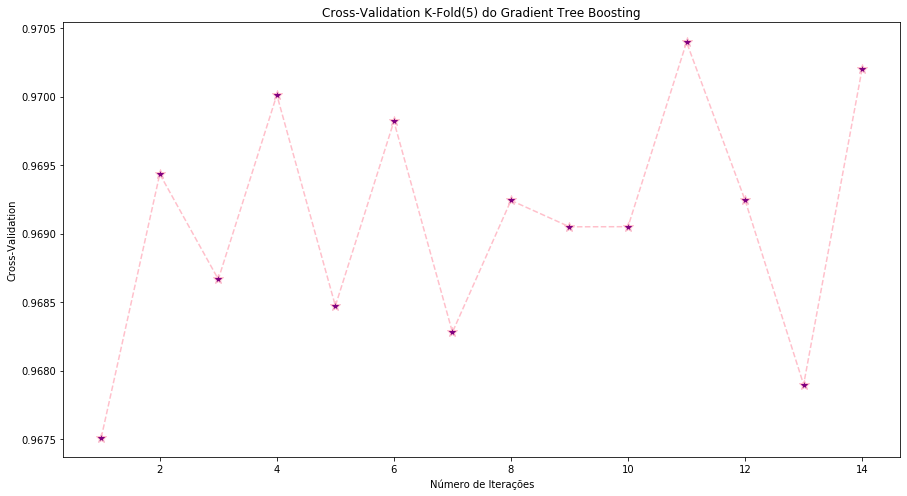

In [63]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 15), cross_val_5, color='pink', linestyle='dashed', marker='*',
         markerfacecolor='purple', markersize=10)
plt.title('Cross-Validation K-Fold(5) do Gradient Tree Boosting')
plt.xlabel('Número de Iterações')
plt.ylabel('Cross-Validation')
plt.show()

***

# ***Comparação dos Modelos***
O modelo que apresentou os melhores resultados foi o do Decision Tree

<h2 style= "color: #8B4513 "> Naive Bayes </h2>

In [64]:
gnb = GaussianNB(var_smoothing=0.0000000000001)

y_pred_bayes = gnb.fit(X_train, y_train).predict(X_test)

Accuracy: 0.9167200512491992


<h2 style= "color: #8B4513 "> Decision Tree </h2>

In [65]:
clf_tree = tree.DecisionTreeClassifier(max_depth=8)

y_pred_tree = clf_tree.fit(X, y).predict(X_test)

Accuracy: 0.9839846252402307


<h2 style= "color: #8B4513 "> SVM </h2>

In [ ]:
svclassifier = SVC(kernel='linear',tol=0.000001)

y_pred_svclassifier = svclassifier.fit(X_train, y_train).predict(X_test)

<h2 style= "color: #8B4513 "> k-NN </h2>

In [66]:
knn = KNeighborsClassifier(n_neighbors=15)

y_pred_knn = knn.fit(X_train, y_train).predict(X_test)

0.8084561178731582


<h2 style= "color: #8B4513 "> Random Forest </h2>

In [76]:
rfc = RandomForestClassifier(n_estimators=11)

y_pred_forest = rfc.fit(X_train, y_train).predict(X_test)

<h2 style= "color: #8B4513 "> Gradient Tree Boosting </h2>

In [77]:
clf_gradient = GradientBoostingClassifier(n_iter_no_change=6)

y_pred_gradient = clf_gradient.fit(X_train, y_train).predict(X_test)

<h1 style= "color:#C71585"> Performace dos Modelos </h1>

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [70]:
precision_1 = precision_score(y_test, y_pred_bayes)
recall_1 = recall_score(y_test, y_pred_bayes)
print('Precisão do Naive Bayes: ',precision_1)
print('Revocação do Naive Bayes: ',recall_1)

precision_2 = precision_score(y_test, y_pred_tree)
recall_2 = recall_score(y_test, y_pred_tree)
print('\nPrecisão do Decision Tree: ',precision_2)
print('Revocação do Decision Tree: ',recall_2)

precision_3 = precision_score(y_test, y_pred_svclassifier)
recall_3 = recall_score(y_test, y_pred_svclassifier)
print('\nPrecisão do SVM: ',precision_3)
print('Revocação do SVM: ',recall_3)

precision_4 = precision_score(y_test, y_pred_knn)
recall_4 = recall_score(y_test, y_pred_knn)
print('\nPrecisão do k-NN: ',precision_4)
print('Revocação do k-NN: ',recall_4)

precision_5 = precision_score(y_test, y_pred_forest)
recall_5 = recall_score(y_test, y_pred_forest)
print('\nPrecisão do Random Forest: ',precision_5)
print('Revocação do Random Forest: ',recall_5)

precision_6 = precision_score(y_test, y_pred_gradient)
recall_6 = recall_score(y_test, y_pred_gradient)
print('\nPrecisão do Gradient Tree Boosting: ',precision_6)
print('Revocação do Gradient Tree Boosting: ',recall_6)

Precisão do Naive Bayes:  0.9876390605686032
Revocação do Naive Bayes:  0.8694232861806311

Precisão do Decision Tree:  0.9955654101995566
Revocação do Decision Tree:  0.9771490750816104

Precisão do k-NN:  0.8587962962962963
Revocação do k-NN:  0.8073993471164309

Precisão do Random Forest:  0.968236582694414
Revocação do Random Forest:  0.9619151251360174

Precisão do Gradient Tree Boosting:  0.9811738648947951
Revocação do Gradient Tree Boosting:  0.9640914036996736


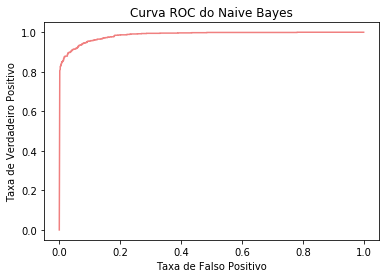

In [71]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr,color='#F08080')
plt.title('Curva ROC do Naive Bayes')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

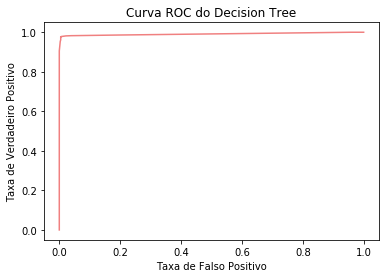

In [72]:
y_pred_proba = clf_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr,color='#F08080')
plt.title('Curva ROC do Decision Tree')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

In [ ]:
y_pred_proba = svclassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr,color='#F08080')
plt.title('Curva ROC do SVM)
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

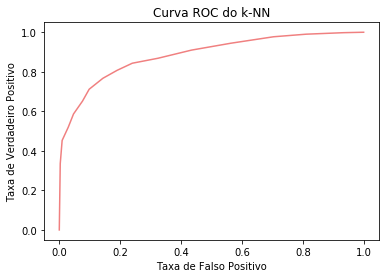

In [73]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr,color='#F08080')
plt.title('Curva ROC do k-NN')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

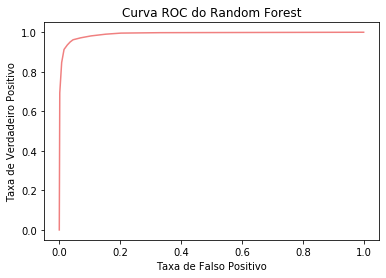

In [74]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr,color='#F08080')
plt.title('Curva ROC do Random Forest')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

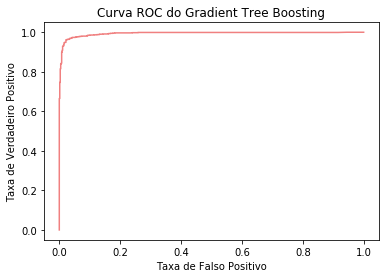

In [75]:
y_pred_proba = clf_gradient.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr,color='#F08080')
plt.title('Curva ROC do Gradient Tree Boosting')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

***